# 가위바위보 분류기 만들기

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
from PIL import Image
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Step 1 : 사이즈 변경, 데이터 불러오기

In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일 사이즈 설정
    target_size=(224,224)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [28]:
def load_data(img_path, number_of_data=300):
    img_size = 224
    color = 3
    
    imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data,dtype = np.int32)
    
    idx = 0
    
    for file in glob.iglob(img_path+'scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 0
        idx +=1
        
    for file in glob.iglob(img_path+'rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 1
        idx +=1
        
    for file in glob.iglob(img_path+'paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 2
        idx +=1
        
    return imgs, labels

# Step 2 : train, test 셋 설정

## train

In [3]:
# https://teachablemachine.withgoogle.com/train/image  
# train, test 데이터는 위의 사이트에서 만들었음
data_path = 'C:/users/juwon/practice_aiffel/rock_scissor_paper/'

scissor_image_path = data_path + 'scissor'
rock_image_path = data_path + 'rock'
paper_image_path = data_path + 'paper'

In [ ]:
resize_images(scissor_image_path) # train 이미지 사이즈 변경
resize_images(rock_image_path)
resize_images(paper_image_path)

In [4]:
x_train, y_train = load_data(data_path, number_of_data=600)
x_train_norm = x_train / 255.0  # 픽셀 값 정규화(0~ 1)
print(x_train_norm.shape, y_train.shape)

(600, 224, 224, 3) (600,)


라벨:  2


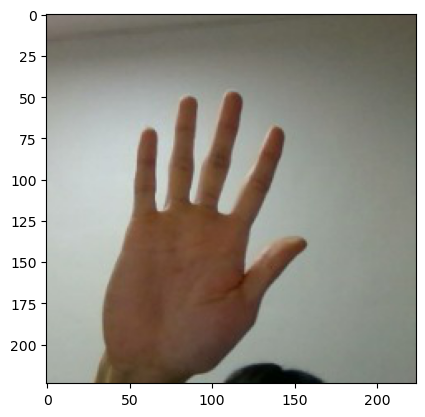

In [382]:
plt.imshow(x_train[400])
print('라벨: ', y_train[400])

## test

In [77]:
test_path = data_path + 'test/'

scissort_image_path = test_path + 'scissor'
rockt_image_path = test_path+'rock'
papert_image_path = test_path + 'paper'

In [49]:
resize_images(scissort_image_path) # test 이미지 사이즈 변경
resize_images(rockt_image_path)
resize_images(papert_image_path)

119  images to be resized.


C:\Users\juwon\AppData\Local\Temp\ipykernel_1536\2001413051.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


119  images resized.


In [111]:
x_test, y_test = load_data(data_path+'test/')
x_test_norm = x_test / 255.0 # 픽셀 값 정규화(0 ~ 1)
print(x_test_norm.shape, y_test.shape)

(300, 224, 224, 3) (300,)


라벨:  1


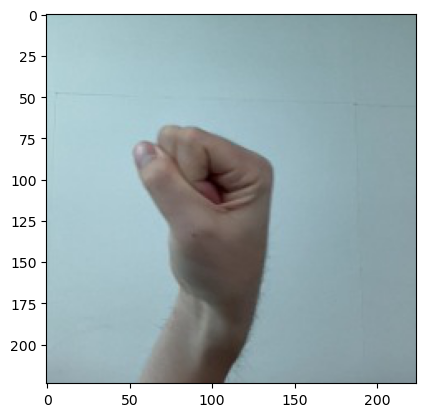

In [381]:
plt.imshow(x_test[120])
print('라벨: ', y_test[120])

## Step 3 : 모델 설계하기

In [407]:
n_channel_1 = 64
n_channel_2 = 128
# n_channel_3 = 32
# n_channel_4 = 64
# n_channel_5 = 1024
n_dense = 128
n_train_epoch = 5

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1,(4,4), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2,(2,2), activation='relu'),)
model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(n_channel_3,(3,3), activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(n_channel_4,(3,3), activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(n_channel_5,(3,3), activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3,activation='softmax'))

model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_165 (Conv2D)         (None, 221, 221, 64)      3136      
                                                                 
 max_pooling2d_162 (MaxPooli  (None, 110, 110, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_166 (Conv2D)         (None, 109, 109, 128)     32896     
                                                                 
 max_pooling2d_163 (MaxPooli  (None, 54, 54, 128)      0         
 ng2D)                                                           
                                                                 
 flatten_64 (Flatten)        (None, 373248)            0         
                                                                 
 dense_128 (Dense)           (None, 128)             

## Step 4 : 모델 학습 시키기

In [408]:
model.compile(optimizer ='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_norm, y_train, validation_split=0.2, epochs = n_train_epoch)

Epoch 1/5
15/15 [==============================] - 11s 737ms/step - loss: 3.2453 - accuracy: 0.6313 - val_loss: 1.4116 - val_accuracy: 0.2500
Epoch 2/5
15/15 [==============================] - 11s 729ms/step - loss: 0.1085 - accuracy: 0.9792 - val_loss: 0.5267 - val_accuracy: 0.7750
Epoch 3/5
15/15 [==============================] - 11s 749ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.2203 - val_accuracy: 0.9250
Epoch 4/5
15/15 [==============================] - 11s 751ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.7059 - val_accuracy: 0.6833
Epoch 5/5
15/15 [==============================] - 11s 742ms/step - loss: 6.7802e-04 - accuracy: 1.0000 - val_loss: 0.2630 - val_accuracy: 0.9167


In [409]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose =2)
print(f'test_loss :{test_loss}')
print(f'test_accuracy : {test_accuracy}')

10/10 - 2s - loss: 0.6779 - accuracy: 0.8167 - 2s/epoch - 169ms/step
test_loss :0.6779084801673889
test_accuracy : 0.8166666626930237


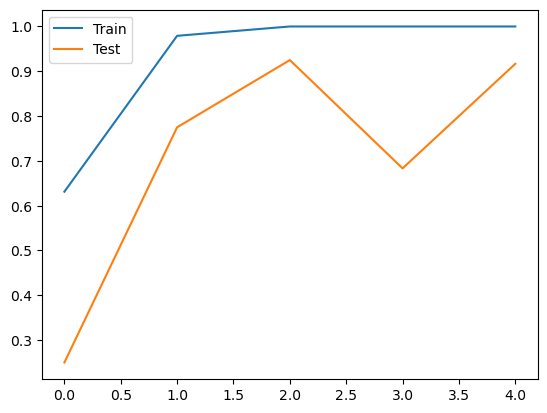

In [410]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Test'])
plt.show()

In [415]:
predict_results = model.predict(x_test_norm)
predict_labels = np.argmax(predict_results, axis=1)
i=0
print(f'확률 분포 : {predict_results[i]}')
print(f'예측한 라벨 : {predict_labels[i]}')
print(f'실제라벨 : {y_test[i]}')

10/10 [==============================] - 1s 147ms/step
확률 분포 : [9.544902e-01 4.548720e-02 2.267569e-05]
예측한 라벨 : 0
실제라벨 : 0


In [412]:
print(predict_labels[0:100])
print(predict_labels[100:200])
print(predict_labels[200:300])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Train 데이터 추가
* Pillow의 Flip을 이용하여 각 100장씩 추가하기로 했다.    
추가전 데이터로는 은닉층 파라미터를 간단하게부터 복잡하게 바꿔봤지만 accuracy가 50%를 넘지 못했다.   
오버피팅이 되어 모델은 가위나 보 중에 한 가지로만 대답했다.

* 추가 후 파라미터를 계속 변경하면서 accuracy는 추가 전보다 올라갔다.    
모델은 보자기는 잘맞추었다. 가위나 바위는 다 맞출때가 있었지만 가위를 다 맞췄다면 바위에 대한 예상도 전부 가위로 했다.    

In [94]:
def img_flip(img_path) :
    imgs = glob.glob(img_path+"/*.jpg")
    print(len(imgs), "images to be flipped")
    i = 100
    for file in imgs :
        origin = Image.open(file)
        flipped = origin.transpose(Image.FLIP_LEFT_RIGHT)
        flipped.save(img_path+f"/{i}.jpg", "JPEG")
        i += 1
    print(len(imgs), "images flipped")

In [95]:
img_flip(data_path+'scissor')
img_flip(data_path+'rock')
img_flip(data_path+'paper')

100 images to be flipped
100 images flipped
100 images to be flipped


C:\Users\juwon\AppData\Local\Temp\ipykernel_20680\700285532.py:7: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  flipped = origin.transpose(Image.FLIP_LEFT_RIGHT)


100 images flipped
100 images to be flipped
100 images flipped


## Test 데이터 변경
* Train의 데이터를 늘리면서 보자기에대한 accracy는 해결했지만, 모델은 가위와 보자기 아니면 전부 보자기로 예측을 하는 경우가 많았다.   
모델은 바위를 학습했지만 실전에서 전혀 바위를 찾지도 예측하지도 않고 있다.    
바위에 대한 학습률을 높이기 위해 test 데이터를 변경했다.

* 데이터를 변경하면서 바위에 대한 예측횟수와 acc도 올라갔다.

## accuracy를 올리기 위해
* 레이어가 많은 것 보다 적은게 accuracy가 높았고 val_acc의 편차도 크지 않았다.
* 필터가 많을수록 acc는 높았다. 층이 깊어질수록 필터수도 같이 증가해야 acc가 잘나왔다. 
* Denselayer의 파라미터의 수는 64,128,256에서 적당한 값을 찾았다.
* 필터의 크기는 2~5 사이에서 적당한 값을 찾았다. 필터의 크기가 너무 클 경우에는 train에서 높은 acc여도 test에서 활약하지 못했다.


* 가위와 주먹을 구분하지 못하는 이유가 뭘까? 가위를 바위로 예측한 결과의 확률분포를 살펴보았다. 연속으로 사진을 찍었으니깐 1,2번 사진(가위)은 거의 같은 사진이라고 볼 수 있다. 그치만 1번사진은 바위일 확률이 98%고 2번사진은 가위와 바위일 확률이 4:5 인 경우도 있었다.   
해결을 위해 필터크기 변경과 배치정규화도 해봤지만 별 소용 없었다. 데이터 전처리의 문제로 가야될 거 같은데 시간이 된다면 찾아보고 시도해봐야 겠다.